In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rec = pd.read_csv('Final_cleaned.csv')

In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
df.head()

,r1_ZIP,r1_ZIP3,r1_TAXCLASS,r1_B,r1_ALL,r2_ZIP,r2_ZIP3,r2_TAXCLASS,r2_B,r2_ALL,...,r8_ZIP,r8_ZIP3,r8_TAXCLASS,r8_B,r8_ALL,r9_ZIP,r9_ZIP3,r9_TAXCLASS,r9_B,r9_ALL
0,0.129189,0.111851,0.188208,0.114718,0.193898,1.673748,1.218975,0.950912,1.251427,1.142641,...,1.792742,2.087445,0.900471,2.164448,4.464443,0.107215,0.167600,0.036248,0.175899,0.202067
1,109.479775,94.787025,159.494813,97.216498,164.316703,15.157583,11.039131,8.611533,11.333017,10.347844,...,16.235204,18.904061,8.154728,19.601404,40.430327,0.970946,1.517796,0.328264,1.592957,1.829938
2,0.826566,0.715637,1.204177,0.733979,1.240582,0.644248,0.469200,0.366019,0.481691,0.439818,...,0.690051,0.803486,0.346603,0.833126,1.718425,0.687808,1.075191,0.232539,1.128434,1.296309
3,0.283254,0.245240,0.412656,0.251525,0.425132,2.059708,1.500067,1.170189,1.540002,1.406130,...,2.206142,2.568803,1.108116,2.663562,5.493928,3.298458,5.156192,1.115164,5.411525,6.216588
4,2.112462,1.828958,3.077524,1.875836,3.170565,132.090899,96.200608,75.045287,98.761683,90.176386,...,141.481835,164.739619,71.064456,170.816614,352.330464,423.066028,661.342293,143.032918,694.091742,797.350533


In [5]:
## reset the index with the RECORD number
df.index = rec.RECORD

In [6]:
df.index

Int64Index([      1,       2,       3,       4,       5,       6,       7,
                  8,       9,      10,
            ...
            1069744, 1069745, 1069746, 1069747, 1069748,  400058,  400059,
             400060,  400061, 1053692],
           dtype='int64', name='RECORD', length=1070994)

In [8]:
#df.to_csv('final_data_new.csv')

In [7]:
## z-scaling
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)

## Back-check the "fraud records"

In [13]:
df_1 = pd.DataFrame(scaled_array, columns = df.columns, index = df.index)
df_1.head()

,r1_ZIP,r1_ZIP3,r1_TAXCLASS,r1_B,r1_ALL,r2_ZIP,r2_ZIP3,r2_TAXCLASS,r2_B,r2_ALL,...,r8_ZIP,r8_ZIP3,r8_TAXCLASS,r8_B,r8_ALL,r9_ZIP,r9_ZIP3,r9_TAXCLASS,r9_B,r9_ALL
RECORD,,,,,,,,,,,,,,,,,,,,,
1,-0.207802,-0.127604,-0.141560,-0.127873,-0.156023,0.079344,0.017587,-0.001993,0.018574,0.009954,...,0.044080,0.020177,-0.003896,0.020323,0.061985,-0.044746,-0.011494,-0.011381,-0.011507,-0.011086
2,25.886527,13.474795,27.638323,13.897819,31.610340,1.667265,0.806304,0.309111,0.763363,0.652297,...,0.847149,0.332203,0.280051,0.324647,0.705478,-0.001456,0.007150,-0.007933,0.008280,0.011531
3,-0.041387,-0.040856,0.035604,-0.038425,0.046565,-0.041895,-0.042632,-0.025747,-0.038291,-0.039090,...,-0.017235,-0.003646,-0.025575,-0.002912,0.012854,-0.015647,0.001038,-0.009063,0.001793,0.004117
4,-0.171037,-0.108440,-0.102421,-0.108112,-0.111267,0.124796,0.040163,0.006912,0.039893,0.028340,...,0.067067,0.029109,0.004232,0.029034,0.080404,0.115199,0.057389,0.001360,0.061601,0.072477
5,0.265467,0.119100,0.362279,0.126509,0.420118,15.437897,7.646143,3.007046,7.222257,6.222767,...,7.811453,3.038125,2.742465,2.963782,6.285923,21.153913,9.118007,1.677310,9.678054,11.064156


In [30]:
df_rank = pd.read_csv('final_output.csv', index_col = 0)

//anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [32]:
df_rank.head(10)

,PC_1,PC_2,PC_3,PC_1_encoded,PC_2_encoded,PC_3_encoded,score_1,score_1_rank,score_2,score_2_rank,final_score
RECORD,,,,,,,,,,,
632816,536.673298,-469.429444,567.667151,0.004713,0.007631,0.006366,911.388076,1070994.0,911.385267,1070994.0,1070994.0
565392,659.939837,397.065113,-465.981954,0.004713,0.007631,0.006366,900.178024,1070993.0,900.174498,1070993.0,1070993.0
1067360,136.864410,613.028670,506.177684,0.004713,0.007631,0.006366,806.691926,1070992.0,806.681333,1070992.0,1070992.0
565398,248.909116,-114.557179,-141.190435,0.004713,0.007631,0.006366,308.243142,1070991.0,308.245088,1070991.0,1070991.0
917942,192.850571,-59.545803,-155.809818,0.004713,0.007631,0.006366,254.977930,1070990.0,254.980038,1070990.0,1070990.0
750816,20.412501,121.832996,190.569817,0.004713,0.007631,0.006366,227.105271,1070989.0,227.095412,1070989.0,1070989.0
770594,27.805976,142.658542,170.638975,0.004713,0.007631,0.006366,224.147924,1070988.0,224.137636,1070988.0,1070988.0
821853,25.213308,131.344861,160.887979,0.004713,0.007631,0.006366,209.217889,1070987.0,209.207635,1070987.0,1070987.0
585118,149.020102,-106.059905,-15.760310,0.004732,0.037153,0.187785,183.586714,1070986.0,183.620555,1070986.0,1070986.0


In [46]:
z_score_rank = df_1.loc[[num for num in df_rank.head(10).index], :]
z_score_rank

,r1_ZIP,r1_ZIP3,r1_TAXCLASS,r1_B,r1_ALL,r2_ZIP,r2_ZIP3,r2_TAXCLASS,r2_B,r2_ALL,...,r8_ZIP,r8_ZIP3,r8_TAXCLASS,r8_B,r8_ALL,r9_ZIP,r9_ZIP3,r9_TAXCLASS,r9_B,r9_ALL
RECORD,,,,,,,,,,,,,,,,,,,,,
632816,-0.018788,0.000633,0.249932,0.020469,-0.013373,419.535132,366.323076,844.927591,326.907838,343.418016,...,423.565565,427.413273,819.089347,320.404002,344.084961,438.447051,526.498365,1022.362156,522.283243,604.697486
565392,385.645255,200.486887,274.444830,201.570028,313.834177,369.470505,373.897526,163.719853,343.945769,338.049110,...,471.618805,493.345723,149.425611,464.150598,338.706441,481.380695,673.375615,90.750043,681.118815,595.245510
1067360,609.729136,889.749685,633.270585,894.510703,766.579588,-0.081899,-0.006709,-0.010940,-0.006171,-0.009283,...,-0.036453,-0.006214,0.000173,-0.005845,-0.009811,-0.031935,-0.005555,0.000259,-0.005618,-0.006793
565398,5.300612,2.736314,3.767693,2.751105,4.314217,197.296876,199.679004,87.431628,183.683349,180.535571,...,251.888091,263.510729,79.797079,247.916740,180.910856,257.104934,359.675453,48.468405,363.811390,317.942414
917942,1.486985,0.635402,0.436614,0.495029,0.505120,32.225826,20.323454,8.807830,17.317714,18.199740,...,341.889592,642.669876,223.961302,472.687118,507.622870,283.416064,327.800788,45.329305,256.827220,297.354701
750816,262.357362,182.978632,436.308526,209.124365,228.448843,-0.049780,-0.037019,-0.016975,-0.035238,-0.029192,...,-0.053061,-0.017864,-0.033755,-0.016935,-0.017336,-0.047995,-0.013383,-0.010207,-0.013542,-0.013405
770594,307.322223,184.964964,248.002048,211.394308,230.928932,-0.082848,-0.054273,-0.020517,-0.050635,-0.045366,...,-0.048798,-0.016161,-0.023330,-0.015659,-0.015965,-0.041245,-0.010860,-0.005041,-0.011039,-0.010507
821853,329.951562,278.042633,120.078805,228.193065,249.282876,-0.016934,0.004880,0.021102,-0.001257,0.006504,...,-0.038090,-0.008575,0.001526,-0.010112,-0.010009,-0.028700,-0.006172,0.003555,-0.007981,-0.006967
585118,-0.179484,-0.124734,-0.151325,-0.120313,-0.167189,207.486906,313.628955,195.470207,384.202176,403.604581,...,104.890220,133.243054,178.404271,376.548839,404.379297,43.861777,27.721704,5.406142,30.676791,35.519608


In [47]:
z_score_rank.to_excel('check.xlsx')

In [41]:
df_1.loc[632816,:].values

array([-1.87876907e-02,  6.33279858e-04,  2.49931632e-01,  2.04689702e-02,
       -1.33730675e-02,  4.19535132e+02,  3.66323076e+02,  8.44927591e+02,
        3.26907838e+02,  3.43418016e+02,  5.27072868e+02,  4.80203336e+02,
        1.02317608e+03,  4.77624025e+02,  5.80105476e+02,  9.33017875e-01,
        5.42959570e-01,  1.27033442e+00,  5.93005118e-01,  4.57081673e-01,
        4.16775705e+02,  4.90796126e+02,  9.86185236e+02,  3.36880053e+02,
        4.23035939e+02,  3.97765200e+02,  5.23577237e+02,  1.02667826e+03,
        4.17778696e+02,  5.67943254e+02,  4.10111517e-01,  4.32300283e-01,
        1.69516040e-01,  5.02866921e-01,  2.22547945e-01,  4.23565565e+02,
        4.27413273e+02,  8.19089347e+02,  3.20404002e+02,  3.44084961e+02,
        4.38447051e+02,  5.26498365e+02,  1.02236216e+03,  5.22283243e+02,
        6.04697486e+02])

In [44]:
df_1.loc[565392,:].values

array([385.64525533, 200.48688738, 274.44483035, 201.57002816,
       313.83417746, 369.47050454, 373.89752603, 163.71985339,
       343.94576876, 338.04911022, 442.98684732, 550.14627496,
        95.44519029, 538.30378334, 571.03723863, 839.98344577,
       915.59438447, 547.48930837, 923.1840843 , 898.46836994,
       462.45427063, 668.19612658,  90.33676655, 640.47819819,
       416.42344409, 445.91574906, 722.07362439,  62.73155474,
       718.48881702, 559.06582697, 819.69079624, 732.9092519 ,
       204.11577763, 744.02062998, 544.51665344, 471.61880524,
       493.34572282, 149.42561112, 464.15059828, 338.70644132,
       481.3806946 , 673.37561523,  90.75004349, 681.1188145 ,
       595.24551002])

In [45]:
df_1.loc[1067360,:].values

array([ 6.09729136e+02,  8.89749685e+02,  6.33270585e+02,  8.94510703e+02,
        7.66579588e+02, -8.18985371e-02, -6.70902230e-03, -1.09395964e-02,
       -6.17107433e-03, -9.28327518e-03, -6.45099826e-02, -8.64433535e-03,
       -2.96499176e-03, -8.45770259e-03, -4.27407790e-03,  2.23642026e+02,
        2.87301725e+02,  6.91340058e+02,  2.89659030e+02,  1.67900674e+02,
       -3.28588338e-02, -6.38250267e-03, -4.73802708e-04, -6.11651699e-03,
       -7.58332511e-03, -2.90501664e-02, -5.30827238e-03, -1.32623241e-04,
       -5.28060090e-03, -6.24061346e-03,  2.77109607e+02,  5.30145668e+02,
        6.64558520e+02,  5.38082645e+02,  1.77214879e+02, -3.64529937e-02,
       -6.21393664e-03,  1.73124068e-04, -5.84495225e-03, -9.81103602e-03,
       -3.19349230e-02, -5.55494612e-03,  2.58780734e-04, -5.61754243e-03,
       -6.79321249e-03])

In [8]:
## pca
pca = PCA()
pca_array = pca.fit_transform(scaled_array)

In [13]:
pca.explained_variance_.sum()

45.000042017081334

In [17]:
pca.explained_variance_[:5].sum()

40.01462920137911

In [19]:
sns.set_style('dark')

In [8]:
## scree plot:

## cutoff at 80% variance explained

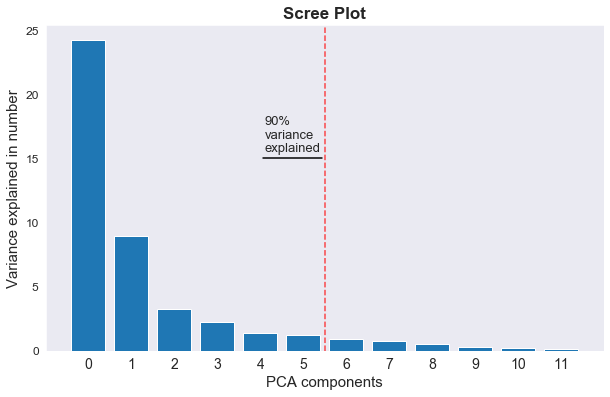

In [38]:
fig = plt.figure(figsize = (10,6))

plt.bar(range(12), pca.explained_variance_[:12], )
ax = plt.gca()
ax.set_yticklabels(range(0,26,5), fontsize = 12)
plt.xticks(range(12), fontsize = 14)
plt.axvline(x = 5.51, linestyle = '--', color = 'red', alpha = 0.7)
plt.axhline(y = 15, xmin = 0.39, xmax = 0.495, color = 'black')
plt.text( x = 4.1, y = 15.5, s = '90%\nvariance\nexplained', fontsize = 13)
plt.xlabel('PCA components', fontsize = 15)
plt.ylabel('Variance explained in number', fontsize = 15)
plt.title('Scree Plot', size = 17, fontweight = 'bold')

plt.show()

In [39]:
# fig.savefig('Scree plot_morePCs.png')

In [40]:
## Caution: index reset
pca_df = pd.DataFrame(pca_array[:,:5], columns = ['PC_'+str(num) for num in range(5)])

In [41]:
pca_df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4
0,-0.136677,-0.327426,-0.183571,0.046248,0.054475
1,24.883344,59.642032,23.073128,5.649659,0.042887
2,0.102500,0.296531,-0.163025,-0.118042,-0.042344
3,0.264396,-0.281328,-0.238406,0.017411,-0.091008
4,50.692607,-15.678147,-6.518522,5.943600,-17.793010


In [113]:
## another z-scale

In [42]:
scaler_2 = StandardScaler()
scaled_array_2 = scaler_2.fit_transform(pca_df)

In [43]:
final = pd.DataFrame(scaled_array_2, columns = pca_df.columns)
final.head()

,PC_0,PC_1,PC_2,PC_3,PC_4
0,-0.027781,-0.109600,-0.102100,0.030609,0.046558
1,5.057718,19.964145,12.832969,3.739236,0.036654
2,0.020834,0.099259,-0.090672,-0.078126,-0.036190
3,0.053740,-0.094170,-0.132598,0.011524,-0.077782
4,10.303635,-5.247990,-3.625516,3.933781,-15.207128


In [44]:
final.index = rec.RECORD

In [45]:
final.tail()

,PC_0,PC_1,PC_2,PC_3,PC_4
RECORD,,,,,
400058,-0.061237,-0.113477,-0.108256,-0.073525,0.050583
400059,-0.061237,-0.113477,-0.108256,-0.073525,0.050583
400060,-0.061237,-0.113477,-0.108256,-0.073525,0.050583
400061,-0.061237,-0.113477,-0.108256,-0.073525,0.050583
1053692,-0.007029,-0.099752,-0.151702,-0.084299,0.035011


## Models

#### 1. Autoencoder

In [18]:
#! pip install keras
#! pip install tensorflow

In [46]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [47]:
final['score_1'] = np.sqrt(final['PC_0']**2 + final['PC_1']**2 + final['PC_2']**2 + final['PC_3']**2 + final['PC_4']**2)

In [48]:
final.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,score_1
RECORD,,,,,,
1,-0.027781,-0.109600,-0.102100,0.030609,0.046558,0.162213
2,5.057718,19.964145,12.832969,3.739236,0.036654,24.552310
3,0.020834,0.099259,-0.090672,-0.078126,-0.036190,0.161001
4,0.053740,-0.094170,-0.132598,0.011524,-0.077782,0.188470
5,10.303635,-5.247990,-3.625516,3.933781,-15.207128,19.838902


In [70]:
## split to train and VALIDATION sets
## y in this case is just put there to use train_test_split function

from sklearn.model_selection import train_test_split
X = final.iloc[:,:5]
y = final.score_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

In [71]:
encoding_dim = 2
input_dim = Input(shape = (5,))
encoded = Dense(encoding_dim, activation = 'relu')(input_dim)
decoded = Dense(5, activation = 'sigmoid')(encoded)
autoencoder = Model(input = input_dim, output = decoded)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


In [72]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.fit(X_train, X_train, nb_epoch = 1, batch_size = 100, shuffle = True, validation_data = (X_test,X_test))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 856795 samples, validate on 214199 samples
Epoch 1/1
856795/856795 [==============================] - 15s 17us/step - loss: -0.3265 - val_loss: -0.1444


In [73]:
prediction = autoencoder.predict(X_train)
prediction

array([[0.00600665, 0.00847601, 0.0047339 , 0.00716149, 0.01057939],
       [0.00595791, 0.00843153, 0.00471362, 0.00715248, 0.01059462],
       [0.00595738, 0.00838524, 0.00452956, 0.007186  , 0.01080968],
       ...,
       [0.01268376, 0.01598369, 0.02117464, 0.0070521 , 0.00527405],
       [0.00569091, 0.00800003, 0.00389188, 0.0072435 , 0.01162158],
       [0.0061812 , 0.00878076, 0.005434  , 0.00708979, 0.00989264]],
      dtype=float32)

In [74]:
prediction_test = autoencoder.predict(X_test)
prediction_test

array([[0.00545923, 0.0074881 , 0.00285758, 0.00744444, 0.01352557],
       [0.00578865, 0.00820553, 0.00436137, 0.00717336, 0.01098977],
       [0.00603083, 0.0086072 , 0.00520727, 0.00708762, 0.01008581],
       ...,
       [0.00598196, 0.00844653, 0.00469527, 0.00716202, 0.01061932],
       [0.0061659 , 0.00887863, 0.0059532 , 0.0070101 , 0.00944433],
       [0.00599339, 0.00849714, 0.00486554, 0.00713495, 0.01043182]],
      dtype=float32)

In [75]:
df1 = pd.DataFrame(np.concatenate((X_train.values, prediction), axis=1), index = X_train.index)
df2 = pd.DataFrame(np.concatenate((X_test.values, prediction_test), axis=1), index = X_test.index)

In [76]:
concat_df = df1.append(df2)
concat_df.columns = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_1_encoded', 'PC_2_encoded', 'PC_3_encoded', 'PC_4_encoded', 'PC_5_encoded']
concat_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_1_encoded,PC_2_encoded,PC_3_encoded,PC_4_encoded,PC_5_encoded
RECORD,,,,,,,,,,
523911,-0.002989,-0.025653,0.006311,0.033554,-0.021641,0.006007,0.008476,0.004734,0.007161,0.010579
824572,-0.011943,-0.008615,0.006186,0.002858,-0.007329,0.005958,0.008432,0.004714,0.007152,0.010595
201850,-0.027206,-0.009116,0.012289,-0.015016,0.023867,0.005957,0.008385,0.004530,0.007186,0.010810
442683,0.032005,0.146418,0.203074,0.111494,0.015209,0.007148,0.010472,0.010682,0.006755,0.007112
784897,-0.019045,-0.051497,-0.038911,-0.026462,-0.014257,0.005728,0.008021,0.003861,0.007261,0.011676


#### 2. Heuristic Function

In [78]:
concat_df['score_1'] = np.sqrt(concat_df['PC_1']**2 + concat_df['PC_2']**2 + concat_df['PC_3']**2 +
                              concat_df['PC_4']**2 + concat_df['PC_5']**2)
concat_df['score_1_rank'] = concat_df.score_1.rank()  ## ascending = True
concat_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_1_encoded,PC_2_encoded,PC_3_encoded,PC_4_encoded,PC_5_encoded,score_1,score_1_rank
RECORD,,,,,,,,,,,,
523911,-0.002989,-0.025653,0.006311,0.033554,-0.021641,0.006007,0.008476,0.004734,0.007161,0.010579,0.047969,198015.0
824572,-0.011943,-0.008615,0.006186,0.002858,-0.007329,0.005958,0.008432,0.004714,0.007152,0.010595,0.017804,10137.5
201850,-0.027206,-0.009116,0.012289,-0.015016,0.023867,0.005957,0.008385,0.004530,0.007186,0.010810,0.042064,149636.0
442683,0.032005,0.146418,0.203074,0.111494,0.015209,0.007148,0.010472,0.010682,0.006755,0.007112,0.276341,1005735.0
784897,-0.019045,-0.051497,-0.038911,-0.026462,-0.014257,0.005728,0.008021,0.003861,0.007261,0.011676,0.073704,404960.0


In [79]:
concat_df['score_2'] = np.sqrt( (concat_df['PC_1'] - concat_df['PC_1_encoded'])**2 + 
                                        (concat_df['PC_2'] - concat_df['PC_2_encoded'])**2 +
                                        (concat_df['PC_3'] - concat_df['PC_3_encoded'])**2 +
                                        (concat_df['PC_4'] - concat_df['PC_4_encoded'])**2 +
                                         (concat_df['PC_5'] - concat_df['PC_5_encoded'])**2)
concat_df['score_2_rank'] = concat_df.score_2.rank()
concat_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_1_encoded,PC_2_encoded,PC_3_encoded,PC_4_encoded,PC_5_encoded,score_1,score_1_rank,score_2,score_2_rank
RECORD,,,,,,,,,,,,,,
523911,-0.002989,-0.025653,0.006311,0.033554,-0.021641,0.006007,0.008476,0.004734,0.007161,0.010579,0.047969,198015.0,0.054616,207983.0
824572,-0.011943,-0.008615,0.006186,0.002858,-0.007329,0.005958,0.008432,0.004714,0.007152,0.010595,0.017804,10137.5,0.030869,33709.5
201850,-0.027206,-0.009116,0.012289,-0.015016,0.023867,0.005957,0.008385,0.004530,0.007186,0.010810,0.042064,149636.0,0.046149,139033.0
442683,0.032005,0.146418,0.203074,0.111494,0.015209,0.007148,0.010472,0.010682,0.006755,0.007112,0.276341,1005735.0,0.259133,1001874.0
784897,-0.019045,-0.051497,-0.038911,-0.026462,-0.014257,0.005728,0.008021,0.003861,0.007261,0.011676,0.073704,404960.0,0.088291,465500.0


In [80]:
concat_df['final_score'] = (concat_df['score_1_rank'] + concat_df['score_2_rank'])/2
concat_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_1_encoded,PC_2_encoded,PC_3_encoded,PC_4_encoded,PC_5_encoded,score_1,score_1_rank,score_2,score_2_rank,final_score
RECORD,,,,,,,,,,,,,,,
523911,-0.002989,-0.025653,0.006311,0.033554,-0.021641,0.006007,0.008476,0.004734,0.007161,0.010579,0.047969,198015.0,0.054616,207983.0,202999.0
824572,-0.011943,-0.008615,0.006186,0.002858,-0.007329,0.005958,0.008432,0.004714,0.007152,0.010595,0.017804,10137.5,0.030869,33709.5,21923.5
201850,-0.027206,-0.009116,0.012289,-0.015016,0.023867,0.005957,0.008385,0.004530,0.007186,0.010810,0.042064,149636.0,0.046149,139033.0,144334.5
442683,0.032005,0.146418,0.203074,0.111494,0.015209,0.007148,0.010472,0.010682,0.006755,0.007112,0.276341,1005735.0,0.259133,1001874.0,1003804.5
784897,-0.019045,-0.051497,-0.038911,-0.026462,-0.014257,0.005728,0.008021,0.003861,0.007261,0.011676,0.073704,404960.0,0.088291,465500.0,435230.0


In [81]:
output = concat_df.sort_values('final_score', ascending = False)
output.head(10)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_1_encoded,PC_2_encoded,PC_3_encoded,PC_4_encoded,PC_5_encoded,score_1,score_1_rank,score_2,score_2_rank,final_score
RECORD,,,,,,,,,,,,,,,
632816,536.673298,-469.429444,567.667151,-428.476470,15.574263,1.0,1.0,1.000000e+00,1.000000,0.000000e+00,1007.205475,1070994.0,1007.002482,1070994.0,1070994.0
565392,659.939837,397.065113,-465.981954,-186.871681,-145.482652,1.0,1.0,1.000000e+00,1.000000,0.000000e+00,930.809702,1070993.0,930.377557,1070993.0,1070993.0
1067360,136.864410,613.028670,506.177684,110.349266,108.535662,1.0,1.0,1.000000e+00,1.000000,0.000000e+00,821.406607,1070992.0,819.743847,1070992.0,1070992.0
917942,192.850571,-59.545803,-155.809818,83.933477,681.390275,1.0,1.0,0.000000e+00,1.000000,1.000000e+00,732.360076,1070991.0,731.134751,1070991.0,1070991.0
585118,149.020102,-106.059905,-15.760310,442.927171,200.131553,1.0,1.0,1.592547e-10,1.000000,1.000000e+00,519.558658,1070990.0,518.240447,1070990.0,1070990.0
585439,127.363281,-97.761655,17.435499,441.367311,11.560038,1.0,1.0,1.000000e+00,1.000000,1.797668e-38,470.129218,1070989.0,469.093458,1070989.0,1070989.0
920628,76.217938,-60.545659,40.143399,196.559093,-288.951392,1.0,1.0,1.000000e+00,0.926489,1.891781e-25,364.986065,1070988.0,364.338901,1070988.0,1070988.0
585120,93.106665,-66.257255,-9.908280,276.705681,125.047267,1.0,1.0,8.845530e-08,1.000000,1.000000e+00,324.591901,1070987.0,323.274956,1070987.0,1070987.0
565398,248.909116,-114.557179,-141.190435,27.987538,80.311377,1.0,1.0,0.000000e+00,1.000000,1.000000e+00,319.760933,1070986.0,319.007449,1070986.0,1070986.0


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
sns.set(style = "white", font_scale = 1.3)

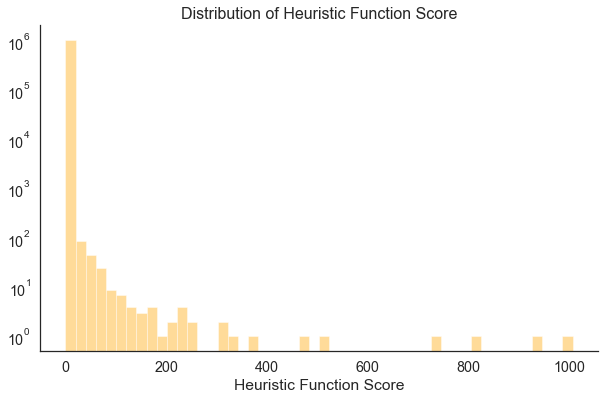

In [125]:
fig_1 = plt.figure(figsize = (10,6))

sns.distplot(output.score_1, kde = False, color='orange')
plt.yscale("log")
plt.xlabel('Heuristic Function Score')
sns.despine()
plt.title('Distribution of Heuristic Function Score', fontsize = 16)
plt.show()

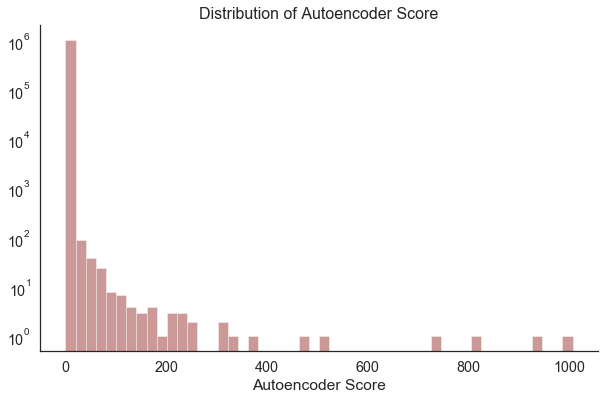

In [126]:
fig_2 = plt.figure(figsize = (10,6))

sns.distplot(output.score_2, kde = False, color='maroon')
plt.yscale("log")
plt.xlabel('Autoencoder Score')
sns.despine()
plt.title('Distribution of Autoencoder Score', fontsize = 16)
plt.show()

In [129]:
# fig_1.savefig('score_1.png')
# fig_2.savefig('score_2.png')

In [83]:
output.to_csv('final_output_more_PCs.csv')